# Just an example.You can alter sample code anywhere. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import model

In [2]:
#Fix the random seed
np.random.seed(0)

## Load the training data and label

In [3]:
train_load = np.loadtxt('./data/train.csv',delimiter=',',dtype="int")
test_data = np.loadtxt('./data/test.csv',delimiter=',',dtype="int")

train_data=train_load[:,1:]
train_label=train_load[:,0]

print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))

shape of train_data: (60000, 784)
shape of train_label: (60000,)
shape of test_data: (10000, 784)


## Show the training data

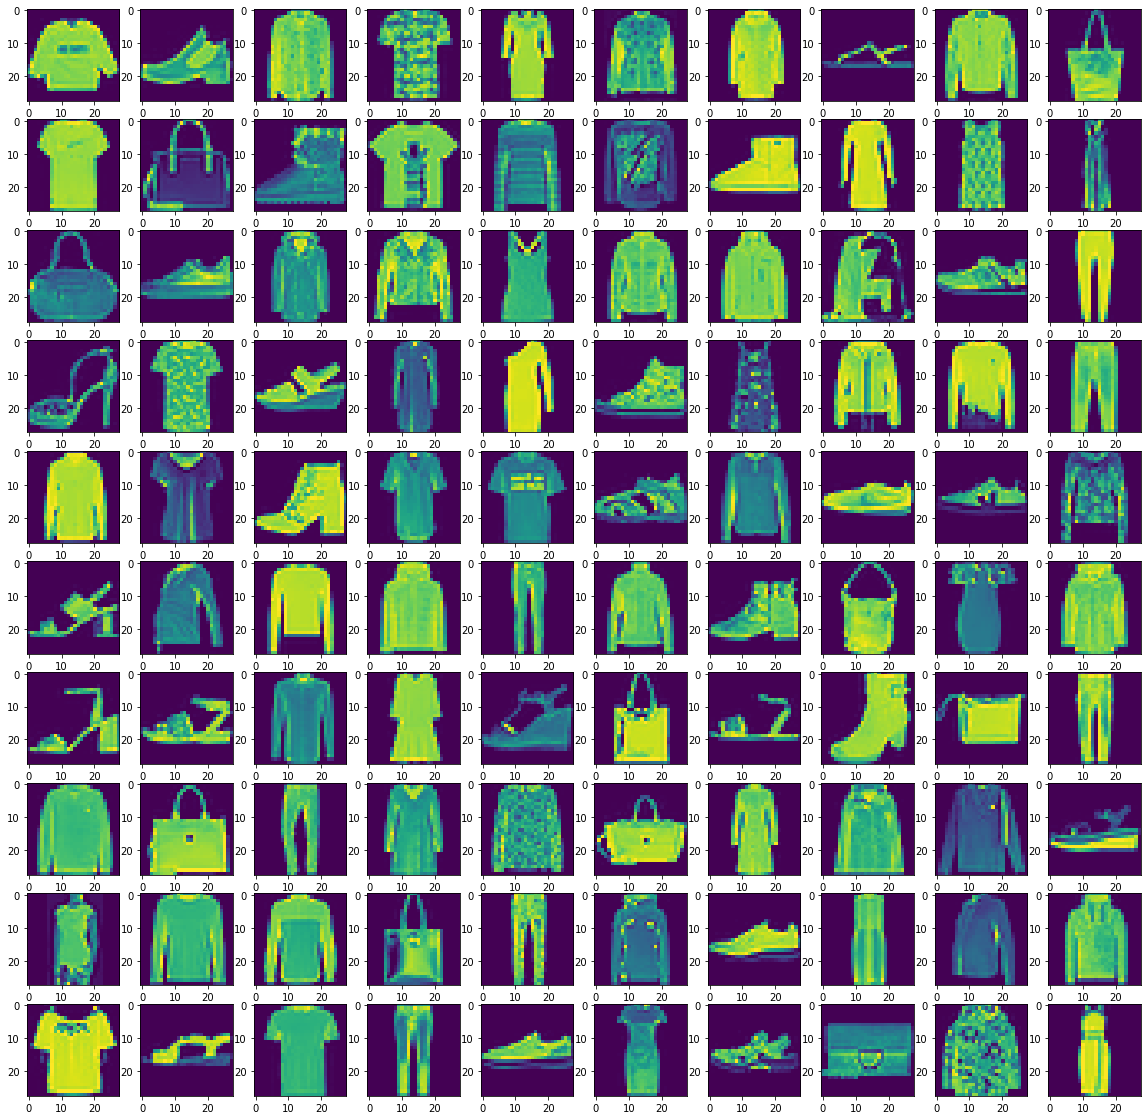

In [4]:
plt.figure(figsize=(20, 20))
for index in range(100):
    image = train_data[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()

In [5]:
train_image_num = train_data.shape[0]
test_image_num = test_data.shape[0]

print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))


print("train_image_num  is : {}".format(train_image_num))
print("test_image_num   is : {}".format(test_image_num))

shape of train_data: (60000, 784)
shape of train_label: (60000,)
shape of test_data: (10000, 784)
train_image_num  is : 60000
test_image_num   is : 10000


In [6]:
val_image_num=1000

## Convert the training labels to one hot vector

In [7]:
label_temp = np.zeros((train_image_num, 10), dtype = np.float32)
for i in range(train_image_num):
    label_temp[i][train_label[i]] = 1
train_label_onehot = np.copy(label_temp)
print("One-hot training labels shape:",train_label_onehot.shape)





One-hot training labels shape: (60000, 10)


## Hyperparameters

In [8]:
EPOCH = 60
Batch_size = 1
Learning_rate = 6e-4


## Training

In [ ]:
net = model.Network()

train_batch_num = (train_image_num  -  val_image_num  )//Batch_size
val_batch_num = (val_image_num)//Batch_size
# test_batch_num = test_image_num//Batch_size

for epoch in range(1, EPOCH+1):
    train_hit = 0
    val_hit = 0
    total_train_loss = 0
    total_val_loss = 0
    for it in range(train_batch_num):
        pred, train_loss = net.forward(train_data[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        pred_index = np.argmax(pred, axis=1)
        train_hit += (pred_index==train_label[it*Batch_size:(it+1)*Batch_size]).sum()
        total_train_loss += train_loss
        
        net.backward()
        net.update(Learning_rate)
        
    for titt in range(val_batch_num):
        tit=train_batch_num+titt
        pred, val_loss = net.forward(train_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])
        pred_index = np.argmax(pred, axis=1)
        val_hit += (pred_index==train_label[tit*Batch_size:(tit+1)*Batch_size]).sum()
        total_val_loss += val_loss
        
    print('Epoch:%3d'%epoch, '|Train Loss:%8.4f'%(total_train_loss/train_batch_num), '|Train Acc:%3.4f'%(train_hit/(train_image_num-val_image_num)*100.0)
          , '|Val Loss:%8.4f'%(total_val_loss/val_batch_num), '|Val Acc:%3.4f'%(val_hit/val_image_num*100.0))

Epoch:  1 |Train Loss:  0.0841 |Train Acc:68.5271 |Val Loss:  0.0553 |Val Acc:80.2000
Epoch:  2 |Train Loss:  0.0431 |Train Acc:84.3746 |Val Loss:  0.0406 |Val Acc:84.7000
Epoch:  3 |Train Loss:  0.0376 |Train Acc:86.3220 |Val Loss:  0.0382 |Val Acc:85.9000
Epoch:  4 |Train Loss:  0.0344 |Train Acc:87.5034 |Val Loss:  0.0361 |Val Acc:86.4000


## Dump for evaluation (upload your DL-test-predict.csv to kaggle )

In [11]:
test_pred_list = []

for tit in range(test_image_num//Batch_size):
    pred, test_loss = net.forward(test_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])
    pred_index = np.argmax(pred, axis=1)
    test_pred_list += pred_index.tolist()
    

print('Dump file...')
df = pd.DataFrame(test_pred_list, columns=["Category"])
df.to_csv('DL-test-predict.csv', index=True, index_label="Id")

Dump file...
